# Capstone: Employee Review Monitoring

---

#### 01: <b>Data Cleaning, EDA</b>

## Introduction

**The Great Resignation**, also known as the Big Quit, is an ongoing economic trend in which employees have voluntarily resigned from their jobs en masse, beginning in early 2021.

The COVID-19 pandemic has allowed workers to rethink their careers, work conditions, and long-term goals. As many workplaces attempted to bring their employees in-person, workers desired the freedom of remote work due to the COVID-19 pandemic as well as schedule flexibility, which was the primary reason to look for a new job of the majority of those studied by Bankrate in August 2021. Additionally, many workers, particularly in younger cohorts, are seeking to gain a better work–life balance. <sup>[source](https://en.wikipedia.org/wiki/Great_Resignation)</sup>

These trends highlight the importance for employers to adopt a data-driven approach to determining not just how many people are quitting, but who exactly has the highest turnover risk, why people are leaving, and what can be done to prevent it.

Employers should conduct a detailed data analysis to determine what's really causing their staff to leave. Which factors could be driving higher resignation rates? They could be factors such as compensation, work-life balance or training opportunites. This analysis can help identify trends and blind spots within the organization so as to retain employees through targeted intervention. <sup>[source](https://hbr.org/2021/09/who-is-driving-the-great-resignation)</sup>

## Problem Statement

In this period of the 'Great Resignation' / the 'Great Reshuffle', organizations should not just simply listen to the grievances of their employees and make empty promises, hoping that staffs would continue working day-by-day as if nothing is wrong. 

Employees have been growing more vocal year after year, and of course, during the pandemic, many of these workers may have simply reached a breaking point after months and months of high workloads, hiring freezes, and other pressures, causing them to rethink their work and life goals. Therefore, timely and targeted action needs to be taken by the firm before employees and ready to call it quits and say enough is enough.

Being a staff in our firm's data analytics and insights team, we were notified by our HR department that our employee retention rate has reached an all-time low this year and that the HR department do not have enough manpower to read through quarterly employee feedbacks made by all 10,000 employees in the firm. 

Hence, our team has been tasked with automating the process to identify positive and negative reviews made by staffs. Giving HR a brief overview on the ratio of positive to negative reviews and within these reviews, the firm is able to know what positive aspects had the firm done well and what pain points which are affecting retention rate. In doing so, department managers and HR could quickly gain actionable insights.

This would significantly lessen the workload of the HR staffs so that they are able to focus on improving other aspects of HR such as people welfare and organizational culture. 


## Executive Summary

This project explored data collected from Glassdoor reviews, which served as a basis for predicting sentiment of employee reviews within an organization. 

A few classification models were used in order to find our final production model for prediction. We have tested a number of combinations of vectorizers, classifiers and text normalization methods: 

**Text Normalization used:**

`Lemmatization`

**Vectorizers used:**

`CountVectorizer` and `Tfidfvectorizer`

**Machine Learning Models used:**

`Multinomial Naïve Bayes`, `Logistic Regression`, `SVM`

**Deep Learning Models used:**

`RNN-LSTM`

We found that a combination of Tfidf-vectorizer and Logistic Regression had the highest specificity score (75.4%) which was our primary scoring metric given that we would want a high specificity for negative reviews (i.e. number of correctly predicted negative reviews) since being able to accurately predict negative reviews would give the company insights into organizational problems.

Next, we would also want to ensure that actionable insights were easily obtainable by using a topic modeling algorithm known as `Latent Dirichlet Analysis`(LDA). From the LDA results ran on negative Glassdoor reviews, we were able to identify 5 topic groups, also known as pain points within the organization, such that HR / management could do further analysis om them and act on them as soon as they can to keep employee retention rates and employee satisfaction high. 

In conclusion, through this project, we hoped to save man-hours of HR staffs or managers that had to read through tens of thousands of lengthy reviews and manually decipher what actions needs to be taken as soon as possible. This is because losing talents within the organization could we very costly.

### Contents:
- [Imports and functions](#Library-and-data-import)
- [Initial Analysis](#Initial-analysis)
- [Data Cleaning](#Data-cleaning)
- [Exploratory Visualizations](#Exploratory-visualizations)
- [Combine dataframes & feature engineer](#Combine-dataframes-&-feature-engineer)
- [Export](#Export)

## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from wordcloud import WordCloud
from collections import Counter

# pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_columns", 20)
pd.set_option("display.max_rows", None)

## Import Data

This data was taken from ...

In [2]:
df = pd.read_csv('../data/train.csv')

## Initial Analysis and Data Cleaning

In [3]:
df.head()

,ID,Place,location,date,status,job_title,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,score_6,overall
0,1,startup_1,NaN,"Dec 11, 2018",Current Employee,Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,NaN,4.0,5.0,5.0,4.0,5.0,0,5.0
1,2,startup_1,"Mountain View, CA","Jun 21, 2013",Former Employee,Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,2.0,3.0,3.0,5.0,3.0,2094,5.0
2,3,startup_1,"New York, NY","May 10, 2014",Current Employee,Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,4.0,5.0,5.0,4.0,949,5.0
3,4,startup_1,"Mountain View, CA","Feb 8, 2015",Current Employee,Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,2.0,5.0,5.0,4.0,5.0,498,4.0
4,10,startup_1,NaN,"Dec 9, 2018",Current Employee,Anonymous Employee,Execellent for engineers,Impact driven. Best tech in the world.,Size matters. Engineers are a bit disconnected...,NaN,5.0,5.0,5.0,5.0,5.0,0,4.0


In [4]:
df.shape

(30336, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30336 entries, 0 to 30335
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30336 non-null  int64  
 1   Place           30336 non-null  object 
 2   location        19082 non-null  object 
 3   date            30336 non-null  object 
 4   status          30336 non-null  object 
 5   job_title       30336 non-null  object 
 6   summary         30284 non-null  object 
 7   positives       30336 non-null  object 
 8   negatives       30336 non-null  object 
 9   advice_to_mgmt  17059 non-null  object 
 10  score_1         27150 non-null  float64
 11  score_2         24286 non-null  float64
 12  score_3         27167 non-null  float64
 13  score_4         27145 non-null  float64
 14  score_5         26851 non-null  float64
 15  score_6         30336 non-null  int64  
 16  overall         30336 non-null  float64
dtypes: float64(6), int64(2), object

In [8]:
# These were categories given in Glassdoor
score_list = {'score_1': 'work_life_balance',
             'score_2': 'culture_and_values',
             'score_3': 'career_opportunities',
             'score_4': 'compensation_and_benefits',
             'score_5': 'senior_management',
             'score_6': 'helpful_count'}
df.rename(columns = score_list,
         inplace = True)


In [9]:
# Sanity check for columns renamed
df.columns

Index(['ID', 'Place', 'location', 'date', 'status', 'job_title', 'summary',
       'positives', 'negatives', 'advice_to_mgmt', 'work_life_balance',
       'culture_and_values', 'career_opportunities',
       'compensation_and_benefits', 'senior_management', 'helpful_count',
       'overall'],
      dtype='object')

In [10]:
# visualize all duplicated reviews if any
df[df.duplicated(keep= False)]

# there are no duplicates

,ID,Place,location,date,status,job_title,summary,positives,negatives,advice_to_mgmt,work_life_balance,culture_and_values,career_opportunities,compensation_and_benefits,senior_management,helpful_count,overall


In [11]:
df.describe()

,ID,work_life_balance,culture_and_values,career_opportunities,compensation_and_benefits,senior_management,helpful_count,overall
count,30336.000000,27150.000000,24286.000000,27167.000000,27145.000000,26851.000000,30336.000000,30336.000000
mean,33998.602716,3.370460,3.784773,3.630047,3.943986,3.322446,1.388482,3.588179
std,19506.284643,1.301983,1.300164,1.225714,1.043053,1.314696,21.390609,0.996981
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,17198.750000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,3.000000
50%,34121.500000,3.500000,4.000000,4.000000,4.000000,3.000000,0.000000,4.000000
75%,50907.500000,4.000000,5.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,67528.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2094.000000,5.000000


## Exploratory Data Analysis

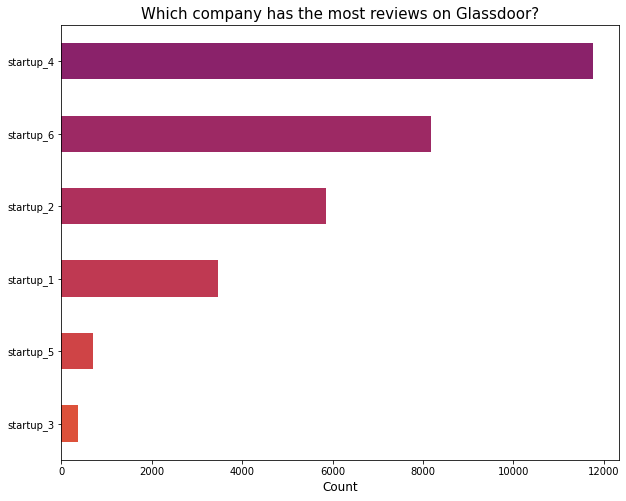

In [12]:
# Visualise number of reviews per company on Glassdoor
from matplotlib import cm
color = cm.inferno_r(np.linspace(.4,.8,10))
plt.figure(figsize=(10,8))
df['Place'].value_counts().sort_values(ascending=True).plot(kind = 'barh', color = color)
plt.title('Which company has the most reviews on Glassdoor?', fontsize = 15)
plt.xlabel('Count', fontsize = 12)
plt.show()

In [13]:
# to visualize the distribution of scores in Glassdoor reviews

def subplot_hist(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(15, nrows *3.5)) 
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): 
        ax[i].hist(dataframe[column], edgecolor='white')
        ax[i].set_title(f'{column} distribution',fontsize=14)
        ax[i].tick_params(labelsize=12)
        ax[i].set_xlabel(column, fontsize=14)
        ax[i].set_ylabel('count', fontsize=12)
        ax[i].grid(False)
    plt.tight_layout()


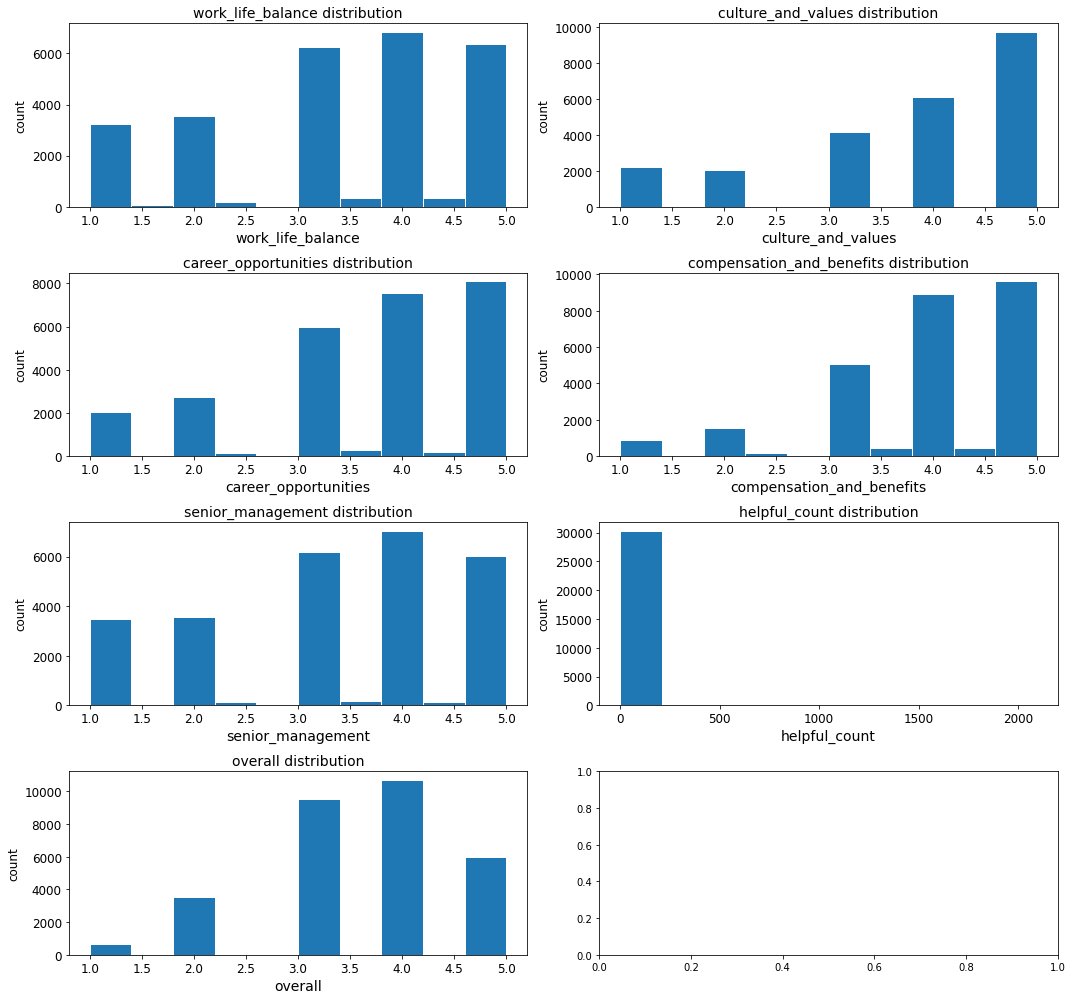

In [14]:
subplot_hist(df, df.columns[10:])

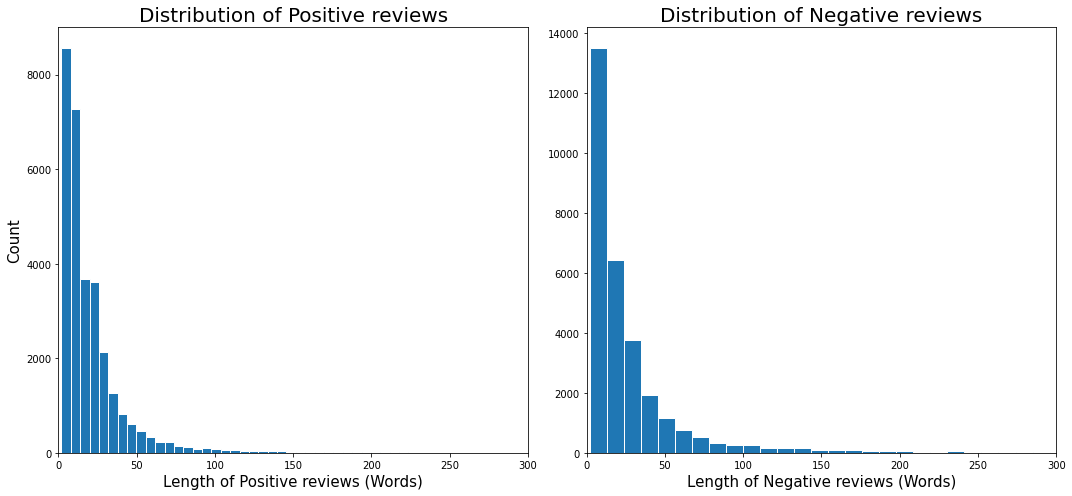

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))


# Average Length of positive reviews
df["positivesLength"] = df["positives"].apply(lambda x: len(x.split(" ")))
df["positivesLength"].astype(int).plot.hist(bins=200, 
                                           ax=ax[0],
                                          edgecolor = 'white')
ax[0].set_xlabel("Length of Positive reviews (Words)", fontsize=15)
ax[0].set_title("Distribution of Positive reviews", fontsize=20)
ax[0].set_ylabel("Count", fontsize=15)
ax[0].set_xlim([0, 300]);

# Average Length of negative reviews
df["negativesLength"] = df["negatives"].apply(lambda x: len(x.split(" ")))
df["negativesLength"].astype(int).plot.hist(bins=200, 
                                           ax=ax[1],
                                          edgecolor = 'white')
ax[1].set_xlabel("Length of Negative reviews (Words)", fontsize=15)
ax[1].set_title("Distribution of Negative reviews", fontsize=20)
ax[1].set_ylabel("", fontsize=15)
ax[1].set_xlim([0, 300]);

plt.tight_layout()

In [17]:
# function for dual bar graphs for top 50 words
def dual_bars_top_words(dataframe, ngram, col1, col2, color, title1, title2):

    # instantiate a basic vectoriser with only settings for extracting bi- and tri-grams
    cvec = CountVectorizer(stop_words = 'english', ngram_range=(ngram, ngram))

    # dataframe 1: fit_transform count vectoriser
    vec1 = cvec.fit_transform(dataframe[col1])
    # create dataframe after tokenized
    vec1 = pd.DataFrame(vec1.toarray(), columns = cvec.get_feature_names_out())

    # dataframe 1: get top 50 phrases with highest count
    vec1_50 = vec1.sum().sort_values(ascending=False).head(50)

    # dataframe 2: fit_transform count vectoriser
    vec2 = cvec.fit_transform(dataframe[col2])
    vec2 = pd.DataFrame(vec2.toarray(), columns = cvec.get_feature_names_out())

    # dataframe 2: get top 50 phrases with highest count
    vec2_50 = vec2.sum().sort_values(ascending=False).head(50)

    # plot results
    fit, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,10), sharex = True)

    sns.barplot(y = vec1_50.index.values, x = vec1_50, color=color, ax=ax[0])
    ax[0].set_title(title1, fontsize=16)
    ax[0].set_xlabel('count of words/phrases', fontsize=13)
    plt.setp(ax[0].get_yticklabels(), fontsize=14)

    sns.barplot(y = vec2_50.index.values, x = vec2_50, color=color, ax=ax[1])
    ax[1].set_title(title2, fontsize=16)
    ax[1].set_xlabel('count of words/phrases', fontsize=13)
    plt.setp(ax[1].get_yticklabels(), fontsize=14)

    plt.tight_layout()

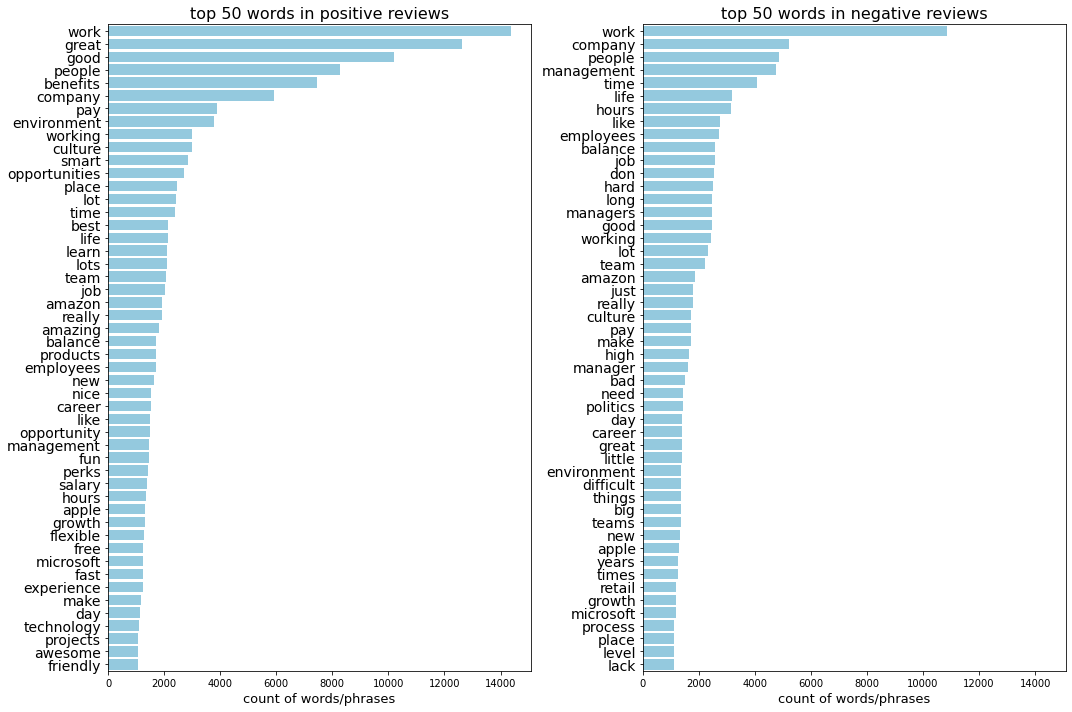

In [18]:
dual_bars_top_words(df, 1, 
                    'positives', 
                    'negatives', 
                    'skyblue',
                   'top 50 words in positive reviews',
                   'top 50 words in negative reviews')

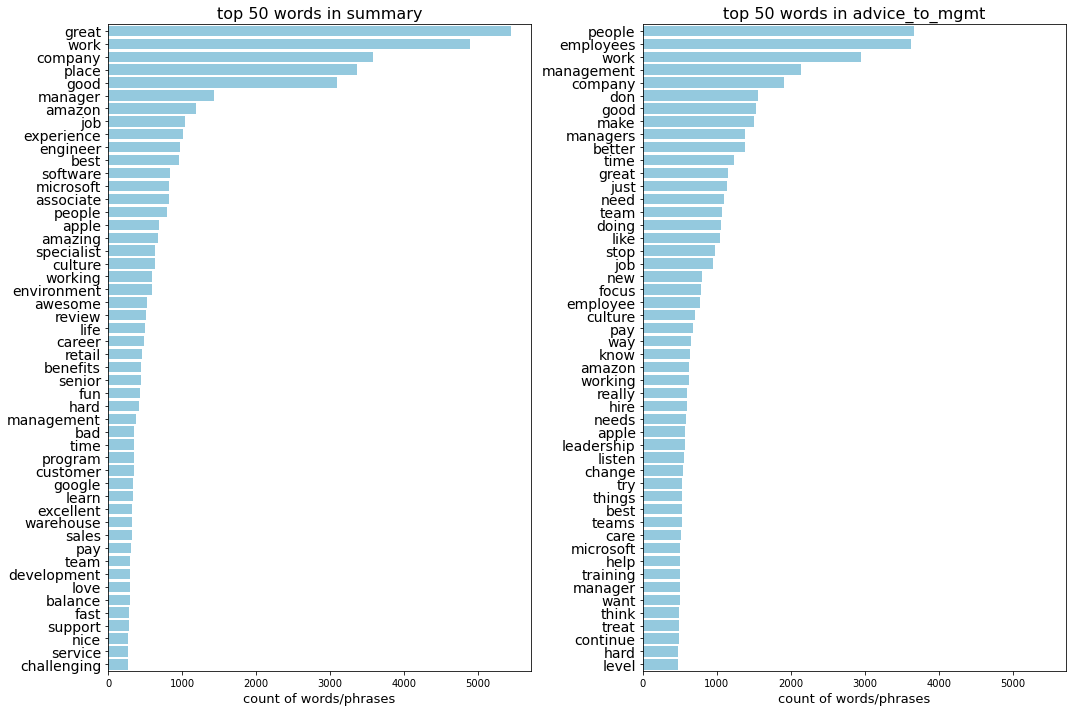

In [19]:
dual_bars_top_words(df, 1, 
                    'summary', 
                    'advice_to_mgmt', 
                    'skyblue',
                   'top 50 words in summary',
                   'top 50 words in advice_to_mgmt')

In [20]:
# function to visualize bi and tri- grams
def top_words(dataframe, col, ngram, title):
#---------- instantiate and fit CountVectorizer -----
    cvec = CountVectorizer(ngram_range = (ngram,ngram), stop_words = 'english')
    corpus = dataframe[col]
    X = cvec.fit_transform(corpus).toarray()
    
#---------- create dataframe after tokenized --------
    X_df = pd.DataFrame(X, columns=cvec.get_feature_names_out())

#---------- plot top occuring words -----------------
    plt.figure(figsize=(8,6))
    X_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh')
    plt.title(title, fontsize = 12)
    plt.xlabel('count of words/phrases', fontsize = 10)
    plt.show()

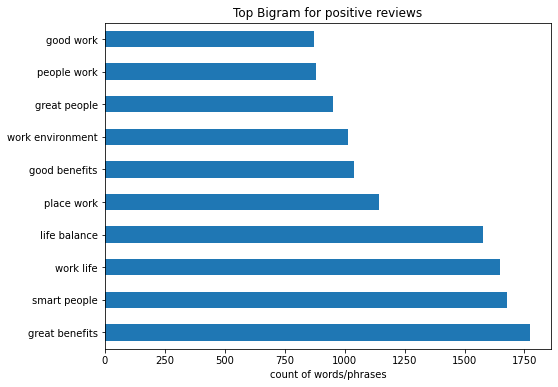

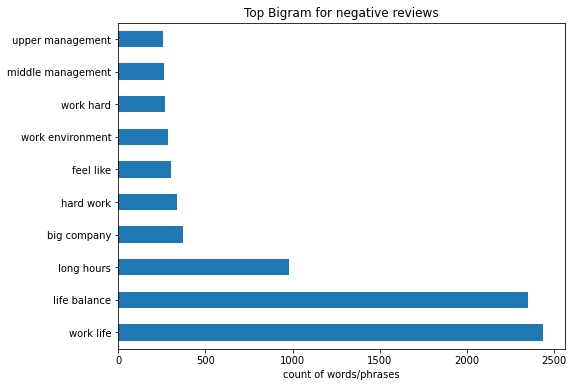

In [31]:
top_words(df,
          'positives',
         2,
         'Top Bigram for positive reviews')

top_words(df,
          'negatives',
         2,
         'Top Bigram for negative reviews')

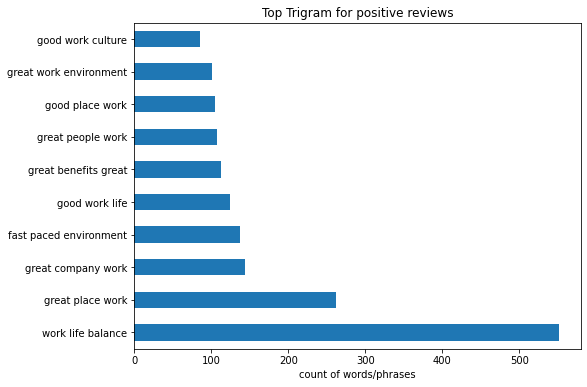

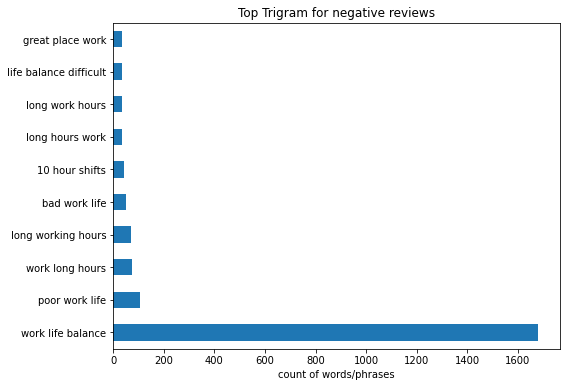

In [32]:
df_trunc = pd.read_csv('../data/train.csv', nrows = 20_000)
top_words(df_trunc,
          'positives',
         3,
         'Top Trigram for positive reviews')

top_words(df_trunc,
          'negatives',
         3,
         'Top Trigram for negative reviews')

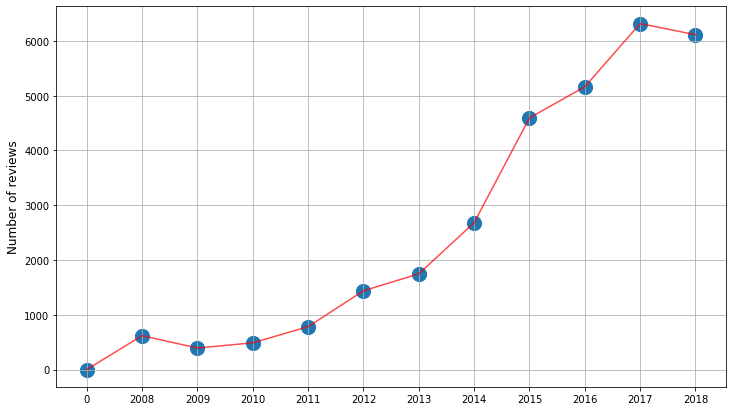

In [23]:
# growth of reviews over time
def year(x):
    if x == 'None':
        year = 0 
    else:
        year = int(x.split(',')[1])
    return year 
df['year'] = df['date'].apply(lambda x : year(x))
c = Counter(df['year'].sort_values())

plt.figure(1 , figsize = (12 , 7))
plt.scatter(x = np.arange(len(c.values())) , y =  c.values() , s = 200 )
plt.plot(np.arange(len(c.values())) , c.values() , alpha = 0.7, color ='r')
plt.xticks(np.arange(len(c.values())) , c.keys())
plt.ylabel('Number of reviews', fontsize = 12)
plt.grid(True)
plt.show()


## WordCloud

In [24]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(20, 14))
    plt.imshow(wordcloud)
    plt.axis("off");

Text(0.5, 1.0, 'Positive Review')

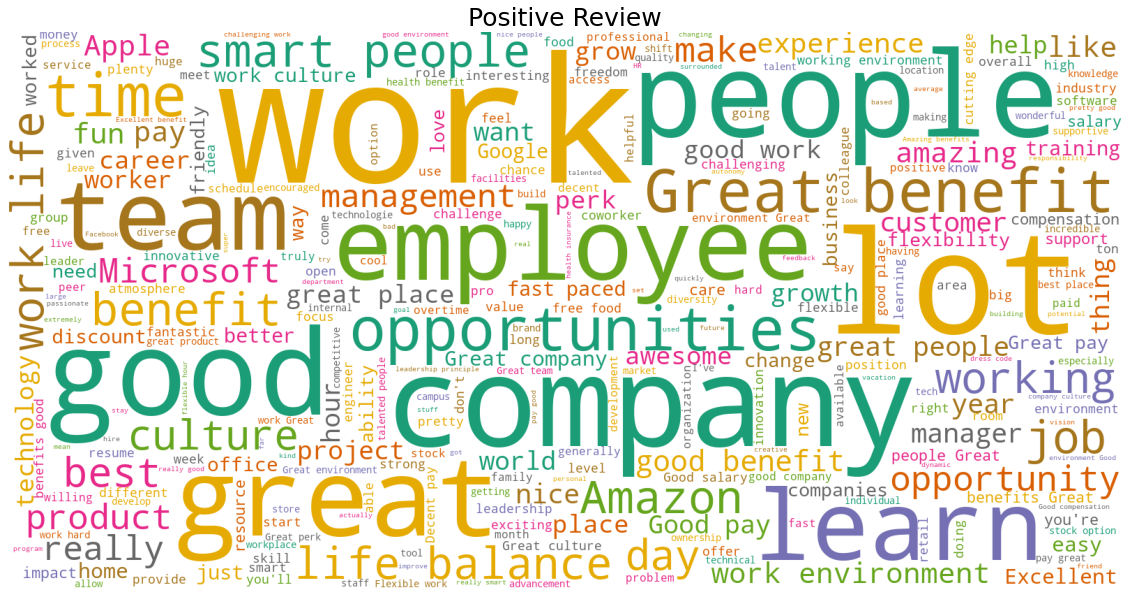

In [25]:
positive_wordcloud = WordCloud(width = 1600, 
                             height = 800, 
                             stopwords= text.ENGLISH_STOP_WORDS, 
                             random_state = 42,
                             background_color = 'white',
                             colormap='Dark2', 
                             max_words=300,
                             max_font_size = 250).generate(' '.join(list(df['positives'])))

plot_cloud(positive_wordcloud)
plt.title('Positive Review', fontsize=25)

Text(0.5, 1.0, 'Negative Review')

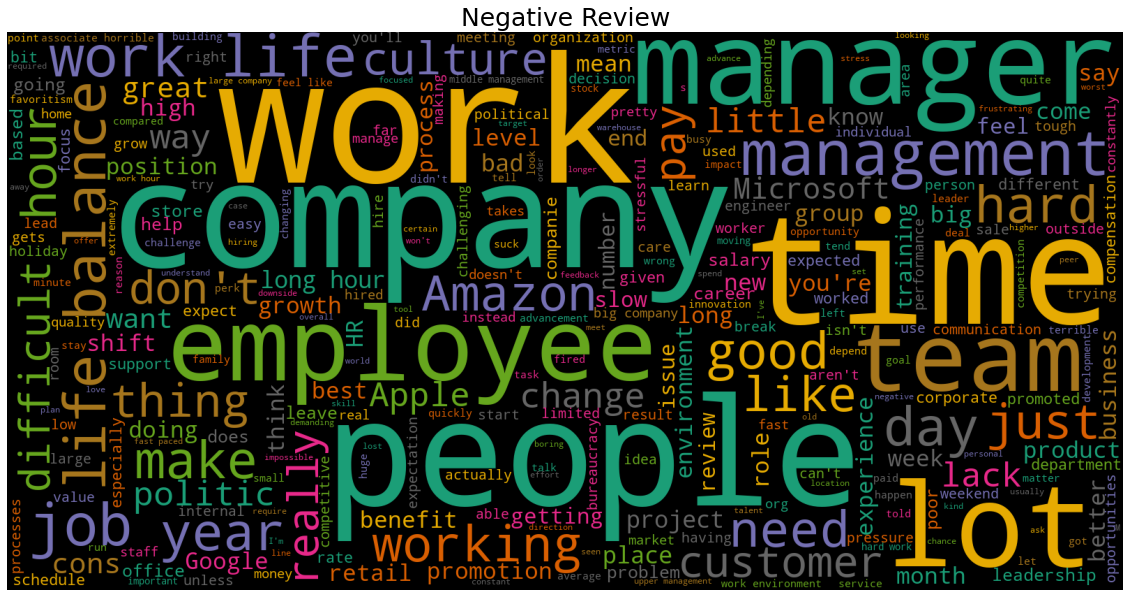

In [26]:
negative_wordcloud = WordCloud(width = 1600, 
                             height = 800, 
                             stopwords= text.ENGLISH_STOP_WORDS, 
                             random_state = 42,
                             background_color = 'black',
                             colormap='Dark2', 
                             max_words=300,
                             max_font_size = 250).generate(' '.join(list(df['negatives'])))

plot_cloud(negative_wordcloud)
plt.title('Negative Review', fontsize=25)

## Export

In [29]:
df.to_csv(f"../data/dataset.csv", index = False)